In [1]:
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from fbprophet import Prophet

In [2]:
#Import needed stock and housing data
housing_file = 'Resources/housing_data.csv'
housing = pd.read_csv(housing_file,index_col=0)
housing.set_index('date',inplace=True)

monthly_1990_stockdata_file = 'Resources/monthly_1990_data.csv'
monthly_1990_stockdata = pd.read_csv(monthly_1990_stockdata_file,index_col=0)
monthly_1990_stockdata_drop = monthly_1990_stockdata['1990-06-01':'1990-11-01']

monthly_dotcom_stockdata_file = 'Resources/monthly_dotcom_data.csv'
monthly_dotcom_stockdata = pd.read_csv(monthly_dotcom_stockdata_file,index_col=0)
monthly_dotcom_stockdata_drop = monthly_dotcom_stockdata['2000-03-24':'2002-10-09']

monthly_2008_stockdata_file = 'Resources/monthly_2008_data.csv'
monthly_2008_stockdata = pd.read_csv(monthly_2008_stockdata_file,index_col=0)
monthly_2008_stockdata_drop = monthly_2008_stockdata['2007-10-31':'2009-03-09']


In [16]:
#Get linear regression slopes
def lin_regression(data):
    slope, intercept, r_value, p_value, std_err = st.linregress(data['Days Since'], data['Price'])
    return slope

monthly_1990_stockdata_drop['Days Since'] = [(pd.to_datetime(x) - pd.to_datetime(monthly_1990_stockdata_drop.index[0])).days for x in monthly_1990_stockdata_drop.index]
slope_monthly_1990_stockdata_drop = lin_regression(monthly_1990_stockdata_drop)

monthly_dotcom_stockdata_drop['Days Since'] = [(pd.to_datetime(x) - pd.to_datetime(monthly_dotcom_stockdata_drop.index[0])).days for x in monthly_dotcom_stockdata_drop.index]
slope_monthly_dotcom_stockdata_drop = lin_regression(monthly_dotcom_stockdata_drop)

monthly_2008_stockdata_drop['Days Since'] = [(pd.to_datetime(x) - pd.to_datetime(monthly_2008_stockdata_drop.index[0])).days for x in monthly_2008_stockdata_drop.index]
slope_monthly_2008_stockdata_drop = lin_regression(monthly_2008_stockdata_drop)

average_slope = np.mean([slope_monthly_1990_stockdata_drop,slope_monthly_dotcom_stockdata_drop,slope_monthly_2008_stockdata_drop])
average_days = np.mean([monthly_1990_stockdata_drop['Days Since'][-1],monthly_dotcom_stockdata_drop['Days Since'][-1],monthly_2008_stockdata_drop['Days Since'][-1]])
average_days_tomonths = int((average_days - average_days%30)/30)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

517.3333333333334

In [36]:
#import 2019 to present data
stock_data_file = 'Resources/monthly_1988to2020_data.csv'
stock_data_1988to2020 = pd.read_csv(stock_data_file,index_col=0)
stock_data_2019topresent = stock_data_1988to2020['2019-01-01':'2020-03-01']
stock_data_2019topresent_fbprophet = stock_data_2019topresent.copy()
stock_data_2019topresent_fbprophet.reset_index(inplace=True)
stock_data_2019topresent_fbprophet = stock_data_2019topresent_fbprophet.rename(columns={'Date':'ds','Price':'y'})

Index(['1988-01-01', '1988-02-01', '1988-03-01', '1988-04-01', '1988-05-01',
       '1988-06-01', '1988-07-01', '1988-08-01', '1988-09-01', '1988-10-01',
       ...
       '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
       '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01'],
      dtype='object', name='Date', length=387)

In [25]:
#Make prediction dataframe with new dates
model = Prophet()
model.fit(stock_data_2019topresent_fbprophet)
future = model.make_future_dataframe(periods=int(average_days))
future = future.rename(columns={'ds':'Date'})
future = future.set_index('Date')
future = future['2020-03-02':]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [26]:
stock_data_2019topresent['Days Since'] = [(pd.to_datetime(x) - pd.to_datetime(stock_data_2019topresent.index[0])).days for x in stock_data_2019topresent.index]
slope2019, intercept2019, r_value2019, p_value2019, std_err2019 = st.linregress(stock_data_2019topresent['Days Since'], stock_data_2019topresent['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
future['Days Since'] = [(pd.to_datetime(x) - pd.to_datetime(future.index[0])).days for x in future.index]
future['Price'] = average_slope*future['Days Since'] + intercept2019

,Price,Days Since
Date,,
2020-03-02,11583.369155,0
2020-03-03,11579.951723,1
2020-03-04,11576.534291,2
2020-03-05,11573.116858,3
2020-03-06,11569.699426,4
...,...,...
2021-07-27,9833.643934,512
2021-07-28,9830.226502,513
2021-07-29,9826.809070,514


Text(0.5, 1.0, 'Stock Price prediction model')

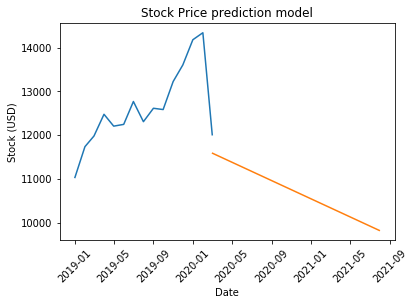

In [57]:
stock_data_2019topresent.index = pd.to_datetime(stock_data_2019topresent.index)

plt.plot(stock_data_2019topresent.index,stock_data_2019topresent)
plt.plot(future.index,future['Price'])
plt.xlabel('Date')
plt.ylabel('Stock (USD)')
plt.xticks(rotation=45)
plt.title('Stock Price prediction model')